In [1]:
#euler test
import numpy as np

r = np.asarray([0,0,1])
center = np.asarray([0,0,0])
r_centered = r-center
print(r_centered)

a = 90
b = 0
y = -90

from scipy.spatial.transform import Rotation

A = Rotation.from_euler('XYZ',[y, b, a], degrees=True)

rotation_matrix = A.as_matrix()
print(rotation_matrix)


#[190.64 149.49 202.24] -> [280.64        99.50677852 342.22322148]


r_centered_rotated = rotation_matrix@r_centered
r_centered_rotated_shifted = r_centered_rotated+center

print(r_centered_rotated_shifted)

[0 0 1]
[[ 2.22044605e-16 -1.00000000e+00  0.00000000e+00]
 [ 2.22044605e-16  0.00000000e+00  1.00000000e+00]
 [-1.00000000e+00 -2.22044605e-16  2.22044605e-16]]
[0.00000000e+00 1.00000000e+00 2.22044605e-16]


In [5]:
# ONE MAGNET STRONG IN THE AIR
# 1. import the b0 map

import numpy as np  
import b0
b0map_iter1 = b0.b0()
#filename_to_import_csv_data_from = r'./data/240731/newinit_norings_240812_bvals_shifted.csv'
filename_to_import_csv_data_from = r'./data/240619/Thursday_ball_R120_12pts_bvals_shifted.csv'

b0map_iter1.import_from_csv(filename_to_import_csv_data_from,eulers=[90,0,-90])
b0map_iter1.transfer_coordinates_of_the_path_from_cosi_to_magnet(filtering=1.1,onesign=True)


# change coordinates to magnet


No path object given on construction of b0 object.
 b0 instance initialized without path.
importing b0 object from csv file./data/240619/Thursday_ball_R120_12pts_bvals_shifted.csv
No path object given on construction of b0 object.
 b0 instance initialized without path.
warning. path file  /home/cosi/cosi-measure/Software/COSI2/data/240719/Thursday_ball_R120_12pts,,,,,,
 not used. path data taken from csv!
importing path from a csv file
ROTATING THE PATH NOW!
path center set to:  [-1.49212153e-03  2.23818229e-03 -3.57200575e+00]
ROTATING THE MAGNET NOW!
len(path.r)= 11487
len(b0Data)= 11487
-111.4292539392357  < x <  111.4307460607643
-116.42575607208153  < y <  115.00424392791848
-115.00349786715418  < z <  107.85650213284583
[8.569999999999993, 8.569999999999993, 8.569999999999993, 8.569999999999993, 8.569999999999993, 8.570000000000022, 8.57000000000005, 8.57000000000005, 8.570000000000022, 8.569999999999993, 8.569999999999993, 8.569999999999993, 8.569999999999993, 8.569999999999993,

In [6]:
print(np.nanmin(b0map_iter1.fieldDataAlongPath[:,0]))
print(np.nanmax(b0map_iter1.fieldDataAlongPath[:,0]))
print(np.nanmin(b0map_iter1.b0Data[:,:,:,0]))
print(np.nanmax(b0map_iter1.b0Data[:,:,:,0]))



-47.809
-47.394
-47.809
-47.394


In [7]:

# spherical decomposition
diameter_of_sphere = b0map_iter1.path.radius*2
order = 17
resolution_of_sph_decomp = 10
print(diameter_of_sphere)

#b0map_before.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)
#b0map_after.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)
b0map_iter1.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)

resolution_of_sph_fit=8
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

#b0map_before.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)
#b0map_after.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)
b0map_iter1.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)


239.91103289828555
(27, 28, 27)
Mean field strength in 23 cm sphere: -47.55 mT
Inhomogeneity in 23 cm sphere: -5783 ppm
Inhomogeneity of fit: 5679 ppm
Error: -1552 ppm
saved numpy array as ./data/tmp/SpHData.npy
interpolating field with sph order 17, resol 8 mm
sph coefficients loaded
making a fine coordinate grid
Inhomogeneity of fit: 5384 ppm
saved numpy array as ./data/tmp/B0_interpolated.npy


22.563278659345595
mean, mT:  -47.55314485940628
low, mT: -47.809 
high, mT: -47.394


<Figure size 640x480 with 0 Axes>

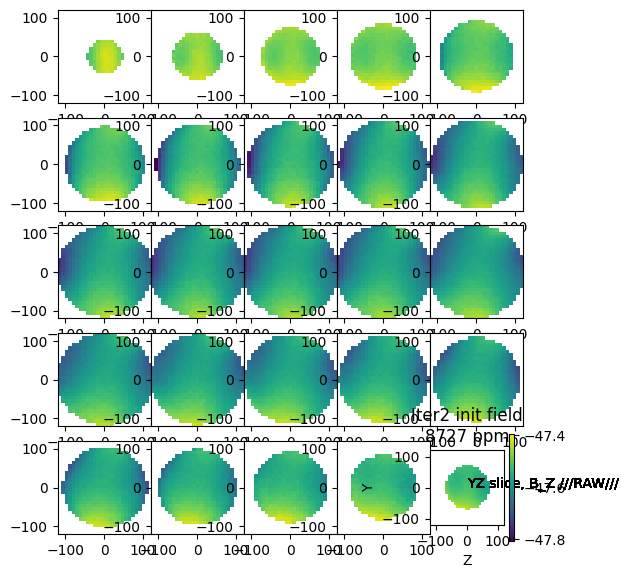

In [9]:
# initial field (RAW)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals = b0map_iter1.xDim_SPH_fine
#FieldMeasured = b0map_iter1.interpolatedField
FieldMeasured = b0map_iter1.b0Data[:,:,:,0]


fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(6, 7))

#xvals = b0map_comsol.xDim_SPH_fine
print((len(b0map_iter1.path.r))**(1/3))


print('mean, mT: ',np.nanmean(FieldMeasured))
print('low, mT:',np.nanmin(FieldMeasured),'\nhigh, mT:',np.nanmax(FieldMeasured))


for i in range(5):
    for j in range(5):
        xxx = axes[i,j].imshow(FieldMeasured[i*5+j,:,:],clim=[np.nanmin(FieldMeasured),np.nanmax(FieldMeasured)],origin = 'lower',extent=[-120,120,-120,120])
        plt.text(0,0,'YZ slice, B_Z ///RAW///')
        axes[i,j].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)
        plt.xlabel('Z')
        plt.ylabel('Y')
        
plt.subplots_adjust(wspace=0, hspace=0)


        
plt.subplots_adjust(wspace=0, hspace=0)

initHomo = abs((np.nanmax(FieldMeasured)-np.nanmin(FieldMeasured))/np.nanmean(FieldMeasured))*1e6
plt.title('Iter2 init field\n%.0f ppm'%initHomo)
plt.colorbar(mappable = xxx)

plt.savefig('./pics/iter2_init_field_raw.png',format="png")
plt.savefig('./pics/iter2_init_field_raw.pdf',format="pdf")
plt.show()




22.563278659345595
mean, mT:  -47.553340178017265
low, mT: -47.70164423265073 
high, mT: -47.445624597333996


<Figure size 640x480 with 0 Axes>

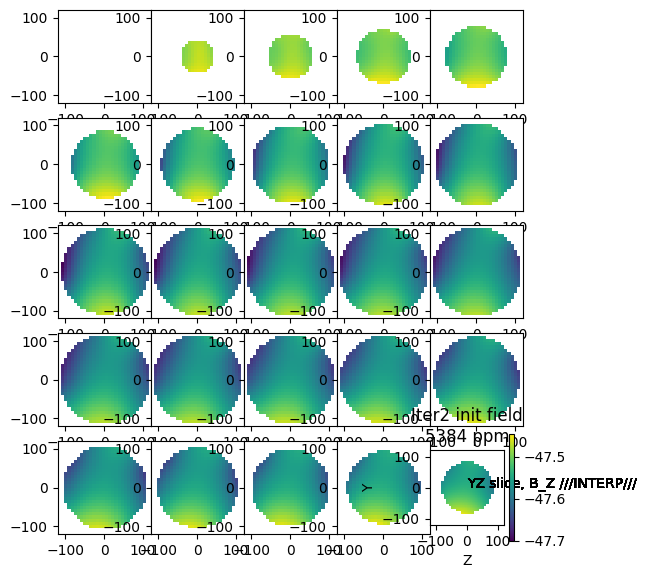

In [10]:

# initial field (INTERPOLATED)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals = b0map_iter1.xDim_SPH_fine
FieldMeasured = b0map_iter1.interpolatedField
#FieldMeasured = b0map_iter1.b0Data[:,:,:,0]


fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(6, 7))

#xvals = b0map_comsol.xDim_SPH_fine
print((len(b0map_iter1.path.r))**(1/3))


print('mean, mT: ',np.nanmean(FieldMeasured))
print('low, mT:',np.nanmin(FieldMeasured),'\nhigh, mT:',np.nanmax(FieldMeasured))

for i in range(5):
    for j in range(5):
        xxx = axes[i,j].imshow(FieldMeasured[i*5+j,:,:],clim=[np.nanmin(FieldMeasured),np.nanmax(FieldMeasured)],origin = 'lower',extent=[-120,120,-120,120])
        plt.text(-0,0,'YZ slice, B_Z ///INTERP///')
        axes[i,j].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)
        plt.xlabel('Z')
        plt.ylabel('Y')
        
plt.subplots_adjust(wspace=0, hspace=0)

initHomo = abs((np.nanmax(FieldMeasured)-np.nanmin(FieldMeasured))/np.nanmean(FieldMeasured))*1e6
plt.title('Iter2 init field\n%.0f ppm'%initHomo)
plt.colorbar(mappable = xxx)

plt.savefig('./pics/iter2_init_field_raw.png',format="png")
plt.savefig('./pics/iter2_init_field_raw.pdf',format="pdf")
plt.show()










In [ ]:

#??? lets generate fields of all inserts, all rings.
#??? Insert X ring 0, minimal Z, Y~0, all rotations pointing to -Z direction (alpha=-pi/2) 0 reference

In [11]:
# shim magnets positinoing

mu                  = 1e-7

magSizeOuter        = 6*1e-3        #size of shim magnets

bRem                = 1.35 # [T]      #remanence field of shim magnets

#shim tray configuration
def ringposFromTrayNr(trays_ocp):
    trayslitspacing = 9e-3 # [m]
    coordinates = []
    for tray_pos in trays_ocp:
        coordinate = trayslitspacing*tray_pos-4.5e-3 if tray_pos>0 else trayslitspacing*tray_pos+4.5e-3
        coordinates.append(coordinate)
    return coordinates


shimRadius          = 260*1e-3#276*1e-3#!!!TMP 276*1e-3#276*1e-3 <- was set by Tom!      # radius on which the shim magnets are placed

trays_occupied = [1]#[-7,-5,1,14] #[-18,-5,1,12] <- 27mm best  [-7,-5,1,14] 997
ringPositions       = ringposFromTrayNr(trays_occupied)#[-121.5*1e-3, -40.5*1e-3, 31.5*1e-3, 121.5*1e-3]#np.linspace(-ringspacingouter,ringspacingouter,4)#np.linspace(-0.1755,0.1755,4)          #np.linspace(-0.2295, .2295, 4) #Z positions to place shin rubgs
print(np.array(ringPositions)*1e3)


[4.5]


In [12]:

magsPerSegment      = 7             # number of magnets peer shim tray segment
anglePerSegment     = 19.25 #the angular distance in degrees between the furthest magnets in a shim tray (span of magnets in shim tray)
numSegments         = 12 #corresponds to the number of shim trays


segmentAngles       = np.linspace(0,360, numSegments, endpoint = False)

magAngles           = np.linspace(-anglePerSegment/2, anglePerSegment/2, magsPerSegment) 

print('let us position some magnets on a circumference of a R=%.0f mm YZ circle with X=0'%(shimRadius*1000))

positions = []
insert_nr = 9 # IRL 3!!!
for ringPosition in ringPositions:
    for segmentAngle in segmentAngles:
        for magAngle in magAngles:
            position = [ringPosition,shimRadius*np.cos((segmentAngle+magAngle)*np.pi/180), shimRadius*np.sin((segmentAngle+magAngle)*np.pi/180)]
            # ONLY INSERT 3, y~0, min(|z|)
            #if (segmentAngle > 360/12*(insert_nr-0.5)) and (segmentAngle < 360/12*(insert_nr+0.5)):
                # choose only Ring 0:
                #if ringPosition == ringPositions[0]:
                    #position[0] = -0.07 #!!!!! TEMP!!!!!
                    #position[2] -=0.03 #!!!!! TEMP!!!!!
                    #print(360/12*(insert_nr-0.5),360/12*(insert_nr+0.5))
            positions.append(position)
                
print(len(positions))

for pos in positions:
    print(pos[0],pos[1],pos[2])


let us position some magnets on a circumference of a R=260 mm YZ circle with X=0
84
0.0045 0.25634002592118954 -0.04347172771726347
0.0045 0.25837121755087095 -0.029057080742575094
0.0045 0.2595924850253051 -0.01455134764847503
0.0045 0.26 0.0
0.0045 0.2595924850253051 0.014551347648475035
0.0045 0.25837121755087095 0.029057080742575105
0.0045 0.25634002592118954 0.04347172771726347
0.0045 0.24373283831314335 0.09052239241104448
0.0045 0.23828457837705758 0.10402143869254984
0.0045 0.23208936048768317 0.11719440578977419
0.0045 0.22516660498395408 0.12999999999999998
0.0045 0.21753801283920812 0.14239807923553086
0.0045 0.2092274976344825 0.1543497788583211
0.0045 0.20026111059587987 0.16581763351014503
0.0045 0.16581763351014503 0.20026111059587987
0.0045 0.1543497788583211 0.2092274976344825
0.0045 0.14239807923553086 0.21753801283920812
0.0045 0.13000000000000003 0.22516660498395405
0.0045 0.11719440578977419 0.23208936048768317
0.0045 0.10402143869254979 0.2382845783770576
0.0045 0

magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
computing field of one shim magnet at  0.0045 0.25634002592118954 -0.04347172771726347
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
computing field of one shim magnet at  0.0045 0.25837121755087095 -0.029057080742575094
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
computing field of one shim magnet at  0.0045 0.2595924850253051 -0.01455134764847503
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
computing field of one shim magnet at  0.0045 0.26 0.0
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
computing field of one shim magnet at  0.0045 0.2595924850253051 0.014551347648475035
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
computing field of one shim magnet at  0.0045 

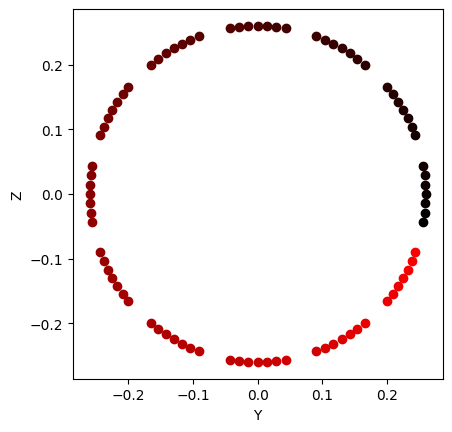

In [22]:

import matplotlib.pyplot as plt
axs = plt.axes()
for idx,position in enumerate(positions):

    axs.scatter(position[1],position[2],color = [idx/len(positions),0,0])

axs.set_aspect(1)
plt.xlabel('Y')
plt.ylabel('Z')


initialField = b0map_iter1.interpolatedField
numMags = len(positions)

# making coordinate grid
xPts = b0map_iter1.xDim_SPH_fine# np.linspace(min(xvals),max(xvals),int((max(xvals)-min(xvals))/resol))
yPts = b0map_iter1.yDim_SPH_fine# np.linspace(min(yvals),max(yvals),int((max(yvals)-min(yvals))/resol))
zPts = b0map_iter1.zDim_SPH_fine# np.linspace(min(zvals),max(zvals),int((max(zvals)-min(zvals))/resol))


xgrid,ygrid,zgrid = np.meshgrid(xPts,yPts,zPts,indexing='ij')

coordinate_grid = [xgrid,ygrid,zgrid]

magnetFields = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)

from utils import shimming_magnet

shimming_magnets = []

for idx1, position in enumerate(positions):
    magnet = shimming_magnet.shimming_magnet(position=position,rotation_yz=0)
    magnet.bRem = bRem # 1.35 T
    magnet.render_field(grid=coordinate_grid)
    magnetFields[:,:,:,:,idx1] = magnet.OLD_singleMagnet(position=position,grid = coordinate_grid)[:,:,:,:] #singleMagnet(position, grid=coordinate_grid)

    shimming_magnets.append(magnet)

magnetFields *= 1e3


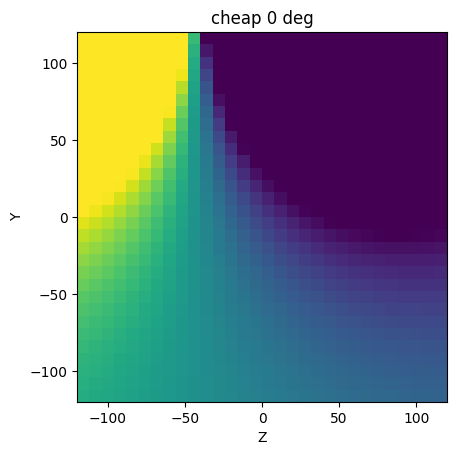

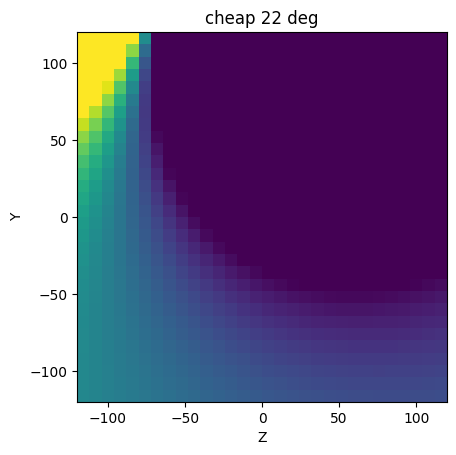

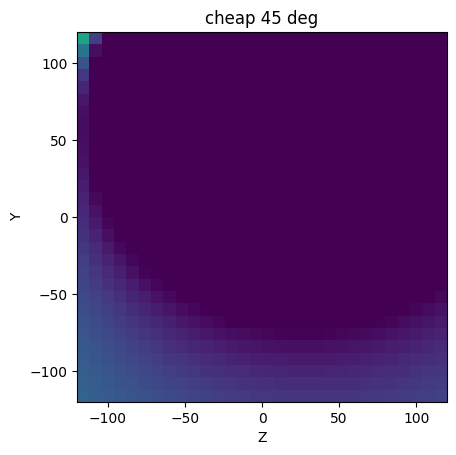

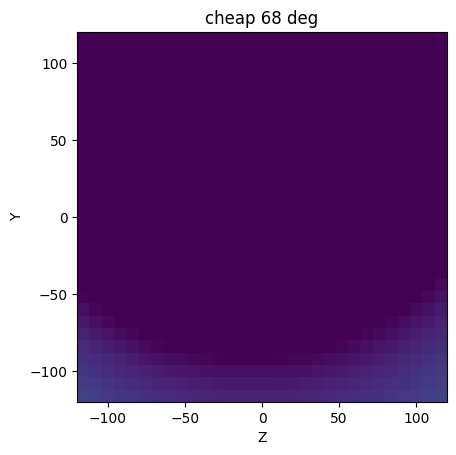

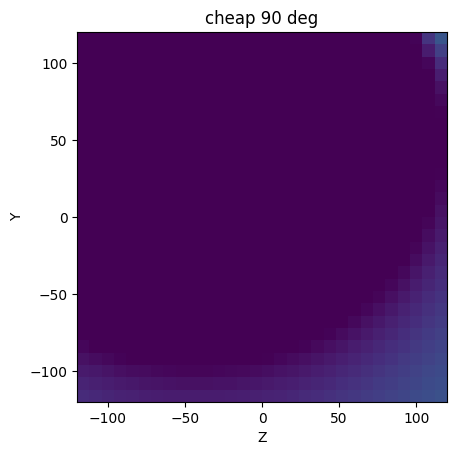

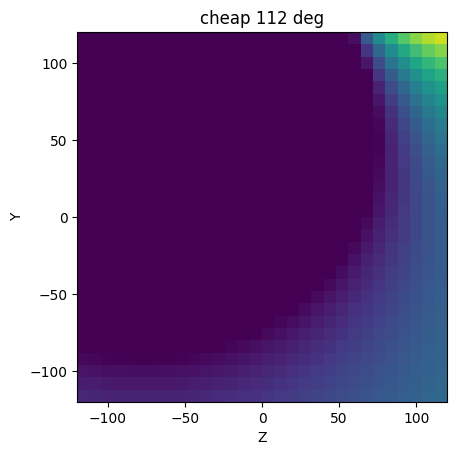

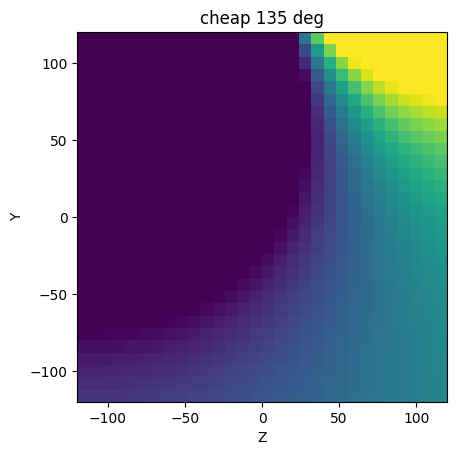

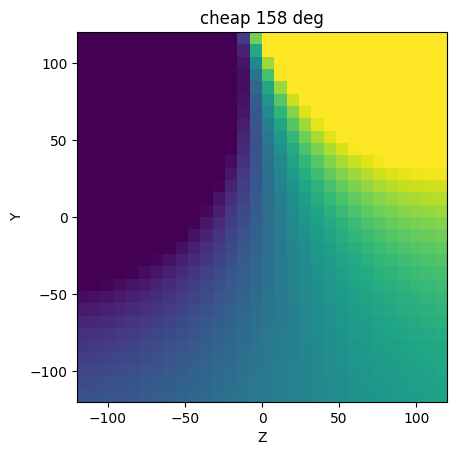

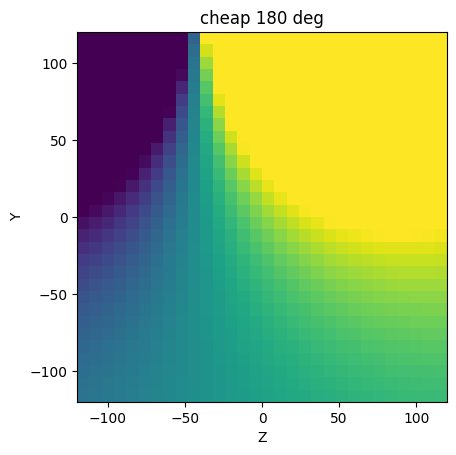

In [45]:
# cheap vs real fields
# DO NOT RUN
plt.cla()

magnet_index = 0
yzsliceidx = 19

for i in range(9):
    alpha = i*np.pi/8
    
    cheapfield = magnetFields[yzsliceidx,:,:,2,magnet_index]*np.cos(alpha)-magnetFields[yzsliceidx,:,:,1,magnet_index]*np.sin(alpha)   
     
    plt.imshow(cheapfield,vmin=-1e-3, vmax=1e-3,extent=[min(zPts),max(zPts),min(yPts),max(yPts)],origin='lower')
    plt.title('cheap %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    
    plt.show()



[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]


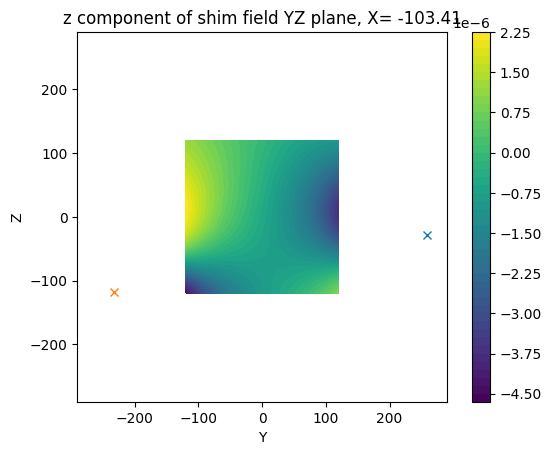

In [61]:
# visualize the field of one insert
resolution = 1/resolution_of_sph_fit*1e3

X = b0map_iter1.xDim_SPH_fine*1e0
Y = b0map_iter1.yDim_SPH_fine*1e0
Z = b0map_iter1.zDim_SPH_fine*1e0

ONEINSERTFIELD = magnetFields[:,:,:,:,0]*0

ax = plt.figure().add_subplot()

for idx in range(1,7*12-1,50):#range(len(positions)):

    position = positions[idx]
    y2d, z2d = np.meshgrid(Y,Z,indexing='ij') #!!!!!!!!!!!

    shimming_magnets[idx].rotation_yz = np.pi/4

    shimming_magnets[idx].render_field(grid=coordinate_grid)
    print(shimming_magnets[idx])
    ONEINSERTFIELD += shimming_magnets[idx].B0_expensive  #magnetFields[:,:,:,:,idx]#+magnetFields[:,:,:,:,idx+14]

    
    ax.plot(position[1]*1000,position[2]*1000,'x')
    
scale = 5e-0
yzsliceindex = 2
mpbl = ax.contourf(y2d,z2d,(ONEINSERTFIELD[yzsliceindex,:,:,2]),cmap='viridis',levels=64)#,vmin = -scale, vmax= scale)

plt.colorbar(mappable=mpbl)
#ax.plot(min(Y),min(Z),'ko')
#ax.plot(max(Y),max(Z),'ko')

ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_xlim(-290,290)
ax.set_ylim(-290,290)
ax.set_aspect(1)
                
ax.set_title('z component of shim field YZ plane, X= %.2f'%(X[yzsliceindex]))

plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.png',format="png")
plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.pdf',format="pdf")

plt.show()

In [108]:
# RENDERING FIELDS OF SHIM MAGNETS

MagnetsField_simulated = shimming_magnets[0].B0[:,:,:,2]*0
    

for magnet_index, pos in enumerate(positions[0:1]):
    alpha = np.pi#-np.pi/2#np.pi/2#np.pi/2#!TEMP-np.pi/2
    cheapfield_onemagnet = magnetFields[yzsliceidx,:,:,2,magnet_index]*np.cos(alpha)-magnetFields[yzsliceidx,:,:,1,magnet_index]*np.sin(alpha)   
    MagnetsField_simulated += cheapfield_onemagnet
    
    
    
#mask the one magnet field:
MagnetsField_simulated*= b0map_iter1.sphere_mask
#MagnetsField_simulated*=1e3 

homo_oneMagnet = (np.nanmax(MagnetsField_simulated)-np.nanmin(MagnetsField_simulated))/np.nanmean(MagnetsField_simulated)*1e6
print('homo of one magnet ppm %.0f'%(abs(homo_oneMagnet)))
print('mean mT %.2f'%(abs(np.nanmin(MagnetsField_simulated))))


homo of one magnet ppm 12124252
mean mT 0.00


30


<Figure size 640x480 with 0 Axes>

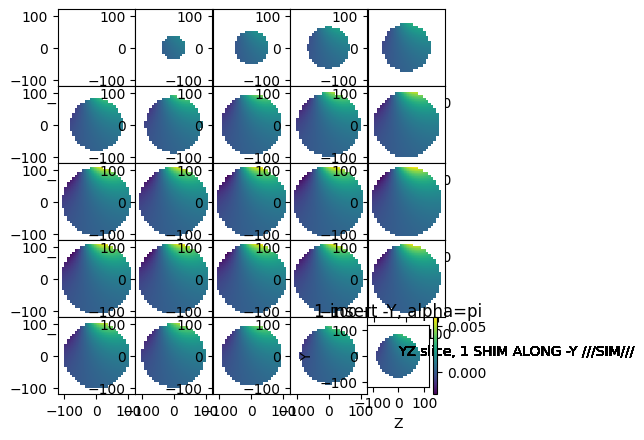

In [110]:
# what we expect with insert at min_z 0y ring 0:
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_iter1.xDim_SPH_fine

d = np.shape(coordinate_grid[0])
print(d[0])

        
for i in range(5):
    for j in range(5):
        xxx = axes[i,j].imshow(MagnetsField_simulated[i*5+j,:,:],clim=[np.nanmin(MagnetsField_simulated),np.nanmax(MagnetsField_simulated)],origin = 'lower',extent=[-120,120,-120,120])
        plt.text(-0,0,'YZ slice, 1 SHIM ALONG -Y ///SIM///')
        axes[i,j].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)
        plt.xlabel('Z')
        plt.ylabel('Y')

plt.subplots_adjust(wspace=0, hspace=0)
plt.title('1 insert -Y, alpha=pi')
plt.colorbar(mappable=xxx)
plt.savefig('./pics/ALL_INSERTS_ALONG_-Y_SIM.png',format="png")
plt.savefig('./pics/ALL_INSERTS_ALONG_-Y_SIM.pdf',format="pdf")

plt.show()


(30, 30, 30, 3, 84)


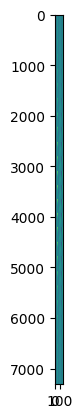

In [111]:
# now least squares for magnet rotation.
# generating the magnetic fields:
# magnet field is magnetFields[:,:,:,2,0]
# mask the magnet fields
DSV = b0map_iter1.path.radius*2 # DEFINED ABOVE!
b0map = b0map_iter1

DSV_INNER = b0map.path.radius*1.5 #!!!TEMP*1.96#1.95 # DEFINED ABOVE!
# make a spherical mask with diameter DSV
sphereMask = np.zeros(np.shape(coordinate_grid[0]), dtype = float)
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV/2)**2] = 1 
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV_INNER/2)**2] = 0 

sphereMask[sphereMask == 0] = np.nan

print(np.shape(magnetFields))

maskedFields =magnetFields[sphereMask == 1, :,:].astype(float) #!!! TEMP!!!!
maskedFields_stacked = np.hstack((maskedFields[:,1,:],maskedFields[:,2,:])) # WE HAVE Y AND Z


plt.imshow(maskedFields_stacked) #


In [112]:

# masking the magnet fields

print(np.shape(maskedFields_stacked))

vector_of_magnet_rotations = np.zeros(len(shimming_magnets))

stackedRotationVector = np.hstack([-np.sin(vector_of_magnet_rotations),np.cos(vector_of_magnet_rotations)])
print(np.shape(stackedRotationVector))

rotatedFieldOfShimMagnetsStacked = np.matmul(maskedFields_stacked,stackedRotationVector)

print(np.shape(rotatedFieldOfShimMagnetsStacked))

(7312, 168)
(168,)
(7312,)


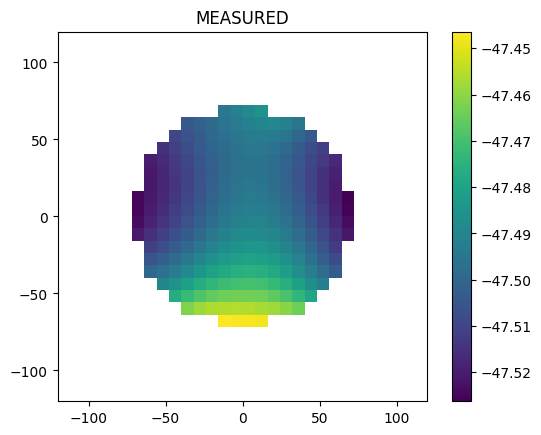

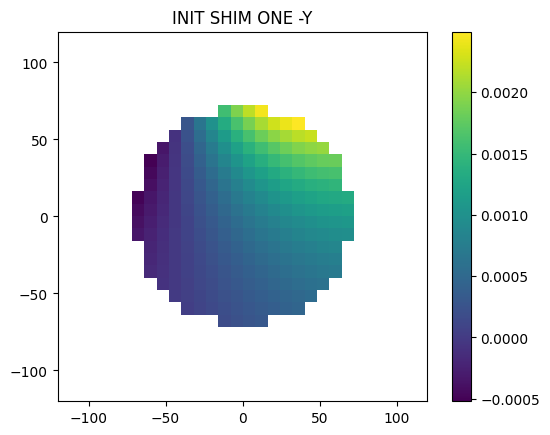

(7312,)
(30, 30, 30)


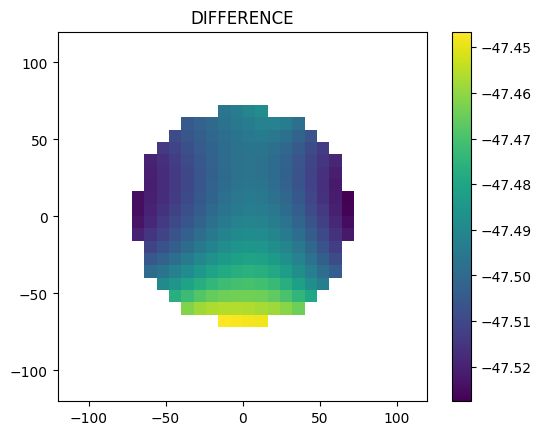

In [115]:
plt.imshow(FieldMeasured[3,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.title('MEASURED')
plt.colorbar()
plt.show()
plt.imshow(MagnetsField_simulated[3,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.title('INIT SHIM ONE -Y')
plt.colorbar()
plt.show()
plt.imshow(FieldMeasured[3,:,:]-1*MagnetsField_simulated[3,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.colorbar()
plt.title('DIFFERENCE')


initialFieldMasked = FieldMeasured[sphereMask == 1]
print(np.shape(initialFieldMasked))
print(np.shape(FieldMeasured))

In [116]:
# ok now we have magnet fields and vector of magnet rotations. we can make fields now
def _dataFitting(shimVector):

            stackedRotationVector = np.hstack([-np.sin(shimVector),np.cos(shimVector)])
            shimField = np.matmul(maskedFields_stacked,stackedRotationVector)+initialFieldMasked


            return np.square(((shimField)/np.mean(shimField)) -1)*1e9

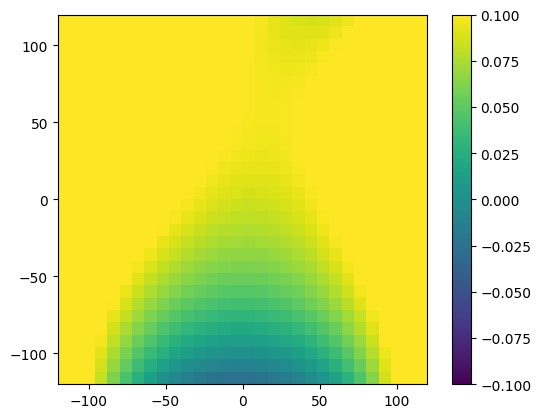

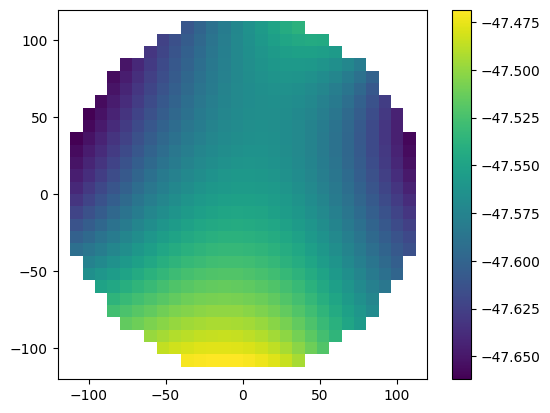

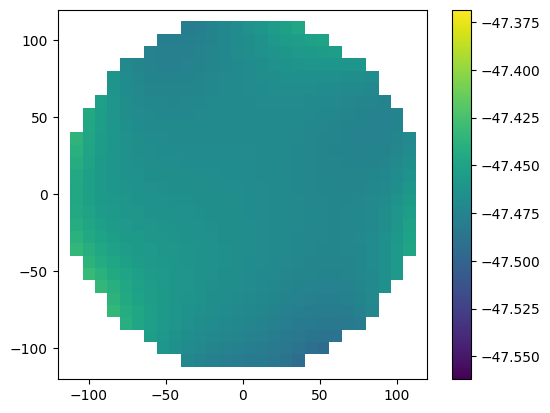

In [137]:
#render the field of rotated magnets
#optimized_vector_of_magnet_rotations = np.zeros(len(shimming_magnets))#-np.pi/2#+np.pi/4*8.05#np.random.randint(40)*2*np.pi/40
optimized_vector_of_magnet_rotations = np.load('optIter2_1ring.npy')

optimized_shim_Field = np.matmul(magnetFields[...,1,:], -np.sin(optimized_vector_of_magnet_rotations)) + np.matmul(magnetFields[...,2,:], np.cos(optimized_vector_of_magnet_rotations))


slicenr = 17
plt.imshow(optimized_shim_Field[slicenr,:,:],vmin=-1e-1,vmax=1e-1,origin='lower',extent=[-120,120,-120,120])
plt.colorbar()
plt.show()
plt.imshow(FieldMeasured[slicenr,:,:],origin='lower',vmin=np.nanmin(FieldMeasured[slicenr,:,:]),vmax = np.nanmax(FieldMeasured[slicenr,:,:]),extent=[-120,120,-120,120])
plt.colorbar()
plt.show()
ofst = 0.1
plt.imshow(FieldMeasured[slicenr,:,:]+optimized_shim_Field[slicenr,:,:],origin='lower',
           vmin=np.nanmin(FieldMeasured[slicenr,:,:])+ofst,
           vmax = np.nanmax(FieldMeasured[slicenr,:,:]+ofst),
           extent=[-120,120,-120,120])
plt.colorbar()
plt.show()



In [138]:
# now do the least squares optimization
vector_of_magnet_rotations =np.load('optIter2_1ring.npy')#
#vector_of_magnet_rotations = np.zeros(len(shimming_magnets))+3*np.pi/2#vector_of_magnet_rotations*0 ##
cost = _dataFitting(vector_of_magnet_rotations)

print(np.sum(cost))

# least squares optimization of the rotation vector
from scipy.optimize import least_squares

initialGuess = vector_of_magnet_rotations
#initialGuess[initialGuess<0.001] = 0.001
lsqData = least_squares(_dataFitting, initialGuess, max_nfev=6400, xtol = 1e-7,ftol=0, verbose=2,bounds=(initialGuess*0,initialGuess*0+2*np.pi))


1015737.5318097263
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.2382e+08                                    1.16e+03    


C:\Users\kuliko02\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_lsq\least_squares.py:824: UserWarning: Setting `ftol` below the machine epsilon (2.22e-16) effectively disables the corresponding termination condition.
  ftol, xtol, gtol = check_tolerance(ftol, xtol, gtol, method)


       1              9         2.2382e+08      8.45e-02       2.10e-04       4.47e+03    
       2             10         2.2382e+08      1.58e-01       8.03e-05       1.85e+03    
       3             11         2.2382e+08      7.98e-02       6.77e-05       1.99e+03    
       4             12         2.2382e+08      8.15e-02       6.33e-05       1.04e+03    
       5             13         2.2382e+08      6.94e-02       5.98e-05       1.73e+03    
       6             14         2.2382e+08      5.03e-02       6.04e-05       1.45e+03    
       7             15         2.2382e+08      7.26e-02       5.24e-05       1.30e+03    
       8             16         2.2382e+08      4.88e-02       5.76e-05       2.64e+03    
       9             17         2.2382e+08      5.14e-02       7.38e-05       1.44e+03    
      10             18         2.2382e+08      5.75e-02       5.76e-05       1.39e+03    
      11             19         2.2382e+08      5.75e-02       6.28e-05       2.29e+03    

In [139]:
optimized_vector_of_magnet_rotations = lsqData.x
np.save('optIter2_1ring.npy',optimized_vector_of_magnet_rotations)
#np.save('opt336magnets_27mm_1607ppm',optimized_vector_of_magnet_rotations)
print(optimized_vector_of_magnet_rotations*180/np.pi)
print(np.mean(optimized_vector_of_magnet_rotations*180/np.pi))
#print(optimized_vector_of_magnet_rotations)

shimFieldRendered = shimming_magnets[0].B0[:,:,:,2]*0
    

for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]
    print(alpha)
    magnet.rotation_yz = alpha#+(np.pi/2-abs(alpha-np.pi/2))*1.41#+2*np.pi/4
    magnet.bRem = bRem
    magnet.render_field(grid=coordinate_grid)
    shimFieldRendered += magnet.B0_expensive[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)

shimField_fair = initialField+shimFieldRendered*1.0e3#[:,:,:]*1+np.multiply(shimFieldRendered[:,:,:,2]*1000,lsqData.x)#+shimFieldRendered[:,:,:,1]*1000 #???? why 1st not 2nd component!?!!s


optimized_shim_Field = np.matmul(magnetFields[...,1,:], -np.sin(lsqData.x)) + np.matmul(magnetFields[...,2,:], np.cos(lsqData.x))


shimmed_Field_final = initialField+optimized_shim_Field

homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_cheap = (np.nanmax(shimmed_Field_final)-np.nanmin(shimmed_Field_final))/np.nanmean(shimmed_Field_final)*1e6
print('homo cheap ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_cheap)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmin(initialField)),abs(np.nanmin(shimmed_Field_final))))


homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_fair = (np.nanmax(shimField_fair)-np.nanmin(shimField_fair))/np.nanmean(shimField_fair)*1e6
print('homo fair ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_fair)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmin(initialField)),abs(np.nanmin(shimmed_Field_final))))

shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
#d = np.shape(coordinate_grid[0])
#print(d[0])


[3.06570273e+02 3.12831076e+02 3.18701733e+02 3.23833225e+02
 3.27550830e+02 2.15902192e-09 3.23348306e+02 1.43334696e-09
 9.56292058e-10 6.16826100e-10 2.67510113e+02 2.74095940e+02
 2.81479069e+02 2.89380805e+02 3.30699729e-10 3.27559806e+02
 3.37206343e+02 3.47300027e+02 3.57899625e+02 3.59999997e+02
 3.60000000e+02 3.60000000e+02 8.59254337e+01 1.02231747e+02
 1.17997030e+02 1.32744363e+02 1.46244944e+02 1.58477447e+02
 1.91839567e+02 2.00088892e+02 2.07772329e+02 2.14982226e+02
 2.21796209e+02 2.28283350e+02 2.34504360e+02 2.54174699e+02
 2.59914720e+02 2.65688491e+02 2.71533848e+02 2.64348107e-10
 3.38974927e-10 4.62967982e-10 3.10314299e+02 3.15434230e+02
 6.39267391e-05 2.90635851e+02 1.85997600e+02 1.82163821e+02
 1.86784389e+02 2.11084235e+02 2.19200580e+02 2.27534823e+02
 2.36050088e+02 2.44720229e+02 2.53524752e+02 2.62447110e+02
 2.93129908e+02 3.02546938e+02 3.12122005e+02 8.43912734e-12
 3.31920072e+02 3.42264239e+02 3.53011578e+02 3.60000000e+02
 3.60000000e+02 3.600000

30


<Figure size 640x480 with 0 Axes>

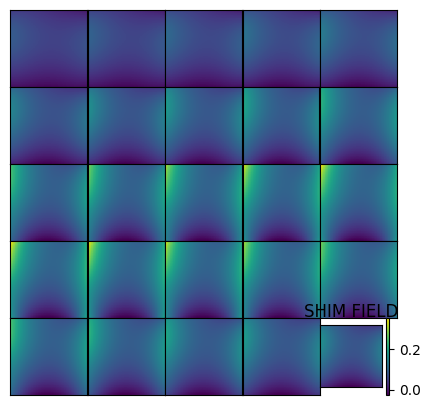

In [142]:
# SHIM FIELD
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_iter1.xDim_SPH_fine

shimoffset = 0# np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
d = np.shape(coordinate_grid[0])
print(d[0])


for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(optimized_shim_Field[i+j*mapsize,:,:],clim=[1.00*np.nanmin(optimized_shim_Field)+shimoffset,1.00*np.nanmax(optimized_shim_Field)+shimoffset],origin='lower')
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIM FIELD')
plt.colorbar(mappable=xxx)

plt.savefig('./pics/shim_field_ITER2_1RING.png',format="png")
plt.savefig('./pics/shim_field_ITER2_1RING.pdf',format="pdf")

plt.show()



shimmed simulated HOMO,ppm: 2592.664151566574


<Figure size 640x480 with 0 Axes>

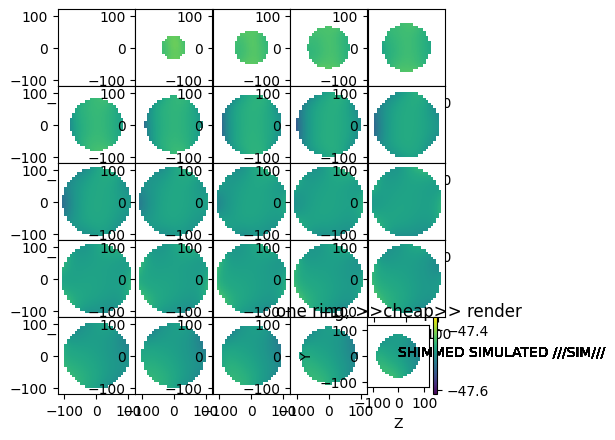

In [145]:
# SHIMMED field
plt.figure(0)

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(mapsize, mapsize))

shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)

homoshimmed = abs((np.nanmax(shimmed_Field_final)-np.nanmin(shimmed_Field_final))/np.nanmean(shimmed_Field_final)*1e6)
print('shimmed simulated HOMO,ppm:',homoshimmed)

      
for i in range(5):
    for j in range(5):
        xxx = axes[i,j].imshow(shimmed_Field_final[i*5+j,:,:],clim=[np.nanmin(initialField)+shimoffset,np.nanmax(initialField)+shimoffset],origin = 'lower',extent=[-120,120,-120,120])
        plt.text(-0,0,'SHIMMED SIMULATED ///SIM///')
        axes[i,j].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)
        plt.xlabel('Z')
        plt.ylabel('Y')

plt.subplots_adjust(wspace=0, hspace=0)
plt.title('one ring, >>cheap>> render')
plt.colorbar(mappable=xxx)

plt.savefig('./pics/shimmed_field_ITER2_1ring.png',format="png")
plt.savefig('./pics/shimmed_field_ITER2_1ring.pdf',format="pdf")

plt.show()




0.25634002592118954 -0.04347172771726347 306.57027295588705
0.25837121755087095 -0.029057080742575094 312.8310761351679
0.2595924850253051 -0.01455134764847503 318.7017329775811
0.26 0.0 323.8332246109735
0.2595924850253051 0.014551347648475035 327.55082982942076
0.25837121755087095 0.029057080742575105 2.1590219226401183e-09
0.25634002592118954 0.04347172771726347 323.34830576346235
0.24373283831314335 0.09052239241104448 1.4333469575523785e-09
0.23828457837705758 0.10402143869254984 9.562920583514974e-10
0.23208936048768317 0.11719440578977419 6.168260996003725e-10
0.22516660498395408 0.12999999999999998 267.51011279595883
0.21753801283920812 0.14239807923553086 274.09593970574474
0.2092274976344825 0.1543497788583211 281.4790687187119
0.20026111059587987 0.16581763351014503 289.3808054369042
0.16581763351014503 0.20026111059587987 3.306997289731163e-10
0.1543497788583211 0.2092274976344825 327.55980561638245
0.14239807923553086 0.21753801283920812 337.2063434829534
0.130000000000000

Text(0, 0.5, 'Z')

<Figure size 640x480 with 0 Axes>

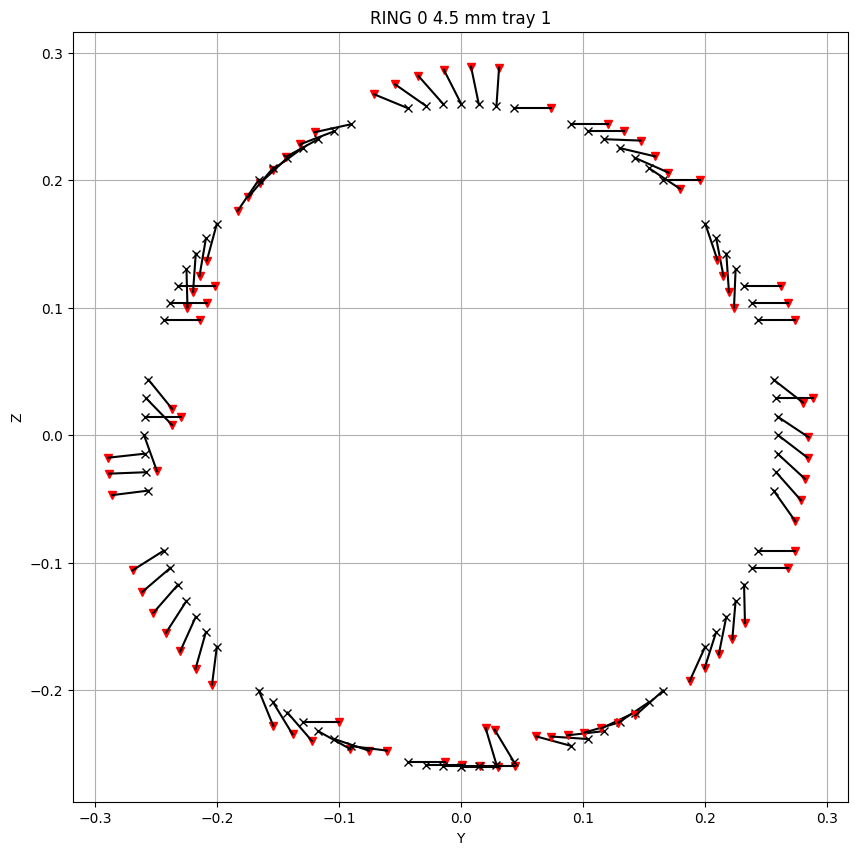

In [146]:
# MAGNET ROTATIONS RING 0
#plotting rotations

ring_number = 0

plt.figure(0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.title('RING %d %.1f mm tray %d'%(ring_number,1e3*ringPosition,trays_occupied[ring_number]))
rdisp = 3e-2 # length of displayed rotation vector 
for idx,tmppos in enumerate(positions):
    if tmppos[0] == ringPosition:
        angle = optimized_vector_of_magnet_rotations[idx]
        print(tmppos[1],tmppos[2],angle*180/np.pi)
        axes.plot(tmppos[1],tmppos[2],'xk')
        direction = [rdisp*np.cos(angle),rdisp*np.sin(angle)]
        axes.plot(tmppos[1]+direction[0],tmppos[2]+direction[1],'rv')
        axes.plot([tmppos[1],tmppos[1]+direction[0]],[tmppos[2],tmppos[2]+direction[1]],'k-')
        

plt.grid(1)
plt.xlabel('Y')
plt.ylabel('Z')



In [ ]:
#?--- REALITY
#? --- REAL MAP RECORDED ---

In [ ]:
# --- REALITY IS: --- 
# one ring with fixed euler rotations, sim promises 2500 ppm
# 1. import the b0 map

import numpy as np  
import b0
b0map_test_ring_reality = b0.b0()
filename_to_import_csv_data_from = r'./data/240731/240828_onering_from_thursday_ball_R120_12pts_bvals_shigt.csv'
b0map_test_ring_reality.import_from_csv(filename_to_import_csv_data_from,eulers=[90,0,-90])
b0map_test_ring_reality.transfer_coordinates_of_the_path_from_cosi_to_magnet()


# change coordinates to magnet

In [ ]:
# spherical decomposition
diameter_of_sphere = b0map_test_ring_reality.path.radius*2
order = 17
resolution_of_sph_decomp = 10
print(diameter_of_sphere)

b0map_test_ring_reality.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)

resolution_of_sph_fit=8
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

b0map_test_ring_reality.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)


In [ ]:
# REAL field (interpolated)
# save REAL field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals = b0map_test_ring_reality.xDim_SPH_fine
ShimmedFieldMeasured = b0map_test_ring_reality.interpolatedField
mapsize = int(np.sqrt(len(ShimmedFieldMeasured[:,0,0])))

shimoffset = np.nanmean(ShimmedFieldMeasured)-np.nanmean(FieldMeasured)

fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))


print(np.nanmean(ShimmedFieldMeasured))

print(np.nanmin(ShimmedFieldMeasured),np.nanmax(ShimmedFieldMeasured))

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(ShimmedFieldMeasured[i+j*mapsize,:,:],clim=[np.nanmin(FieldMeasured)+shimoffset,np.nanmax(FieldMeasured)+shimoffset],origin='lower')
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)

measuredHomo = abs((np.nanmax(ShimmedFieldMeasured)-np.nanmin(ShimmedFieldMeasured))/np.nanmean(ShimmedFieldMeasured)*1e6)
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIMMED measured\n%.0f ppm'%measuredHomo)

plt.savefig('./pics/iter2_onering_real_field.png',format="png")
plt.savefig('./pics/iter2_onering_real_field.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

In [ ]:
# now lets get the measured field with the simulation using the rotations and varying the strength
# SHIMMED field
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_iter1.xDim_SPH_fine



d = np.shape(coordinate_grid[0])
print(d[0])

#!!! TST !!!
shimFieldRendered = shimming_magnets[0].B0[:,:,:,2]*0
for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]
    print(alpha)
    magnet.rotation_yz = alpha#+(np.pi/2-abs(alpha-np.pi/2))*1.41#+2*np.pi/4
    magnet.bRem = NEW_B_REM*1
    pos = positions[idx]
    magnet.position = [pos[0],pos[1],pos[2]]
    magnet.render_field(grid=coordinate_grid)
    shimFieldRendered += magnet.B0[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)

shimmed_Field_final = initialField+shimFieldRendered*1.0e3#[:,:,:]*1+np.multiply(shimFieldRendered[:,:,:,2]*1000,lsqData.x)#+shimFieldRendered[:,:,:,1]*1000 #???? why 1st not 2nd component!?!!s


#!!!!!!!!!!!!

homoshimmed = abs((np.nanmax(shimmed_Field_final)-np.nanmin(shimmed_Field_final))/np.nanmean(shimmed_Field_final)*1e6)
shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
print('shimmed simulated HOMO,ppm:',homoshimmed)

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(shimmed_Field_final[i+j*mapsize,:,:],clim=[1.00*np.nanmin(initialField)+shimoffset,1.00*np.nanmax(initialField)+shimoffset],origin='lower')
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIMMED var simulated\n%.0f ppm'%homoshimmed)

plt.savefig('./pics/shimmed_field_ITER2_1ring.png',format="png")
plt.savefig('./pics/shimmed_field_ITER2_1ring.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

 

In [ ]:
# difference between measured shimmed and intial
diff_measured_field = shimmed_Field_final-ShimmedFieldMeasured
plt.figure(0)

mapsize = int(np.sqrt(len(diff_measured_field[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_iter1.xDim_SPH_fine



d = np.shape(coordinate_grid[0])
print(d[0])

g=3e-2

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(diff_measured_field[i+j*mapsize,:,:],clim=[-g,g])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('VARSIM - REALMEAS')

plt.savefig('./pics/diff_field_ITER2_1ring.png',format="png")
plt.savefig('./pics/diff_field_ITER2_1ring.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

